In [171]:
import pandas as pd
import numpy as np
import os as os
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [172]:
# setting up relative paths
pwd = os.getcwd()
root_dir = os.path.dirname(pwd)
dataset_path =os.path.abspath( os.path.join(root_dir,'data','laptop_data.csv'))
dataset_path

'e:\\laptop price predictor\\Laptop-Price-Predictor\\data\\laptop_data.csv'

In [173]:
df = pd.read_csv(dataset_path)
df


,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


In [174]:
# data cleaning
df.drop(columns="Unnamed: 0",inplace=True,axis=1)
df['Weight'] = df['Weight'].str.replace('kg','')
df['Ram'] = df['Ram'].str.replace('GB','')
df['Ram'] = df['Ram'].astype('int')
df['Weight'] = df['Weight'].astype('float')


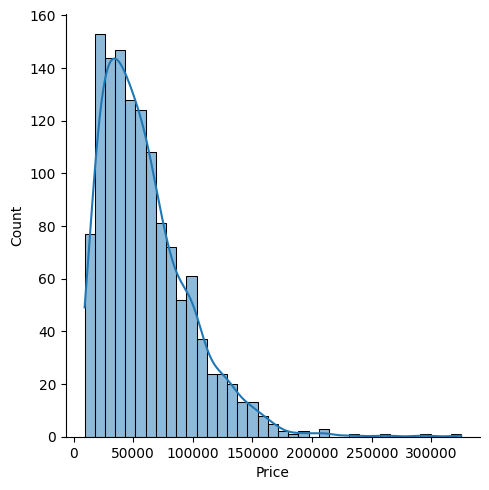

In [175]:
# #EDA
sns.displot(df['Price'],kde=True)
# left side skewed

<Axes: xlabel='Company'>

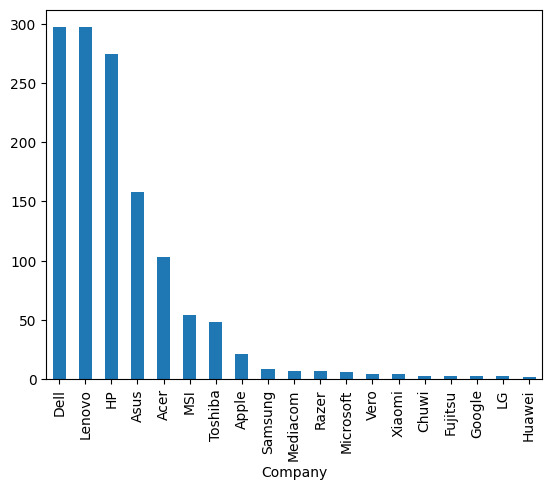

In [176]:
# ,checking which company have more laptop count in dataset

df['Company'].value_counts().plot(kind = 'bar')

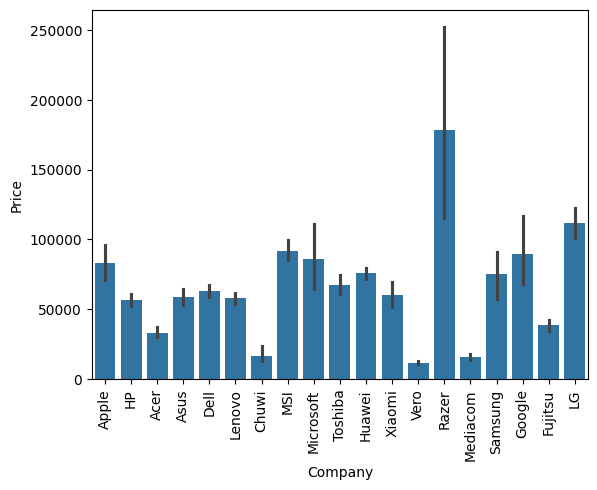

In [177]:
sns.barplot(x=df['Company'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='TypeName'>

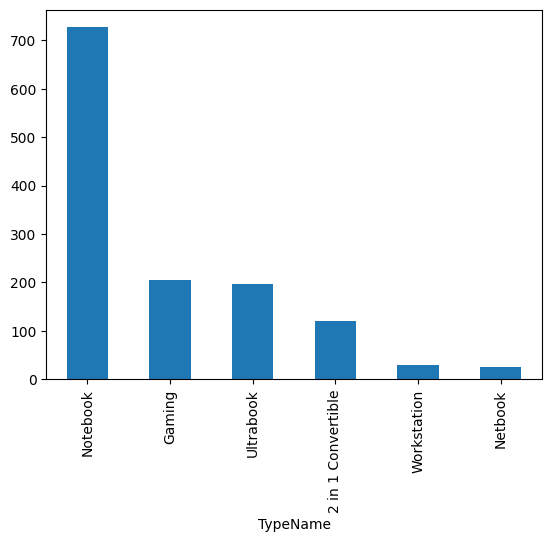

In [178]:
df['TypeName'].value_counts().plot(kind='bar')

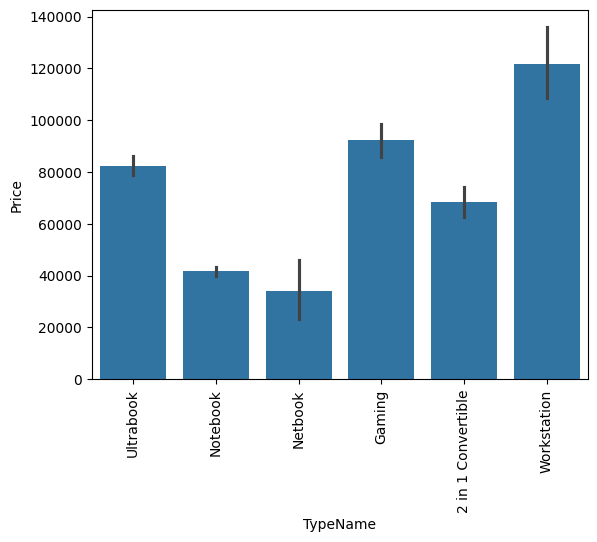

In [179]:
sns.barplot(x=df['TypeName'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='Inches'>

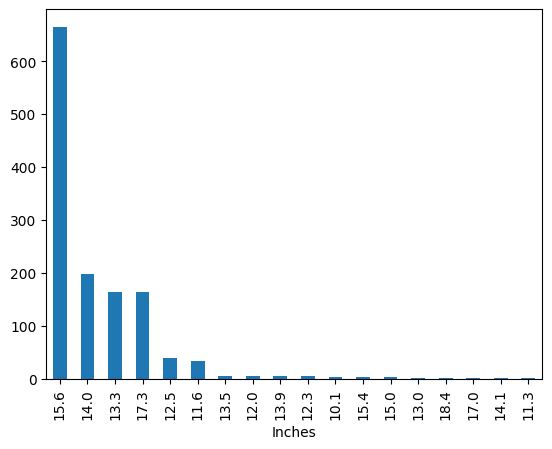

In [180]:
df['Inches'].value_counts().plot(kind='bar')

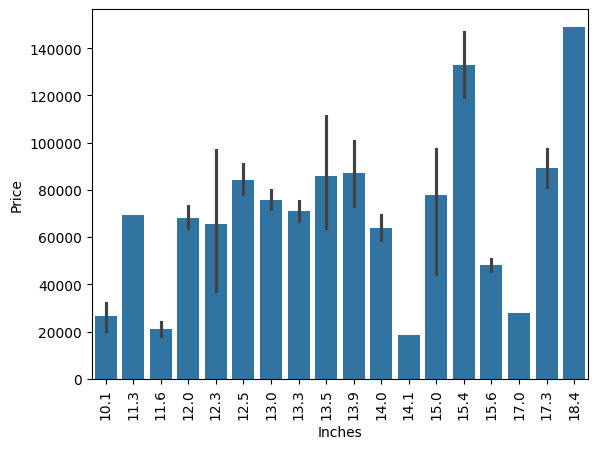

In [181]:
sns.barplot(x=df['Inches'],y=df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

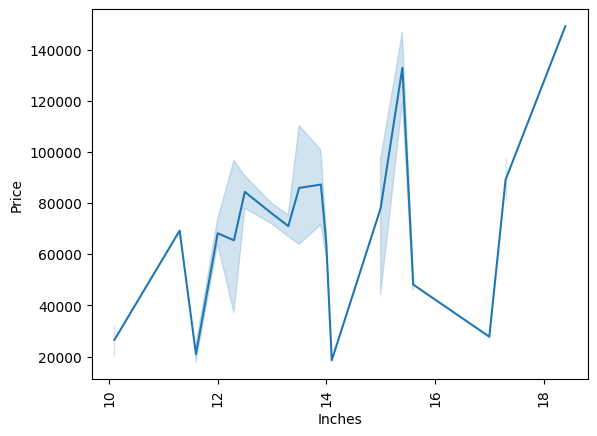

In [182]:
sns.lineplot(x=df['Inches'],y=df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()
# there is low correlation between price and inches

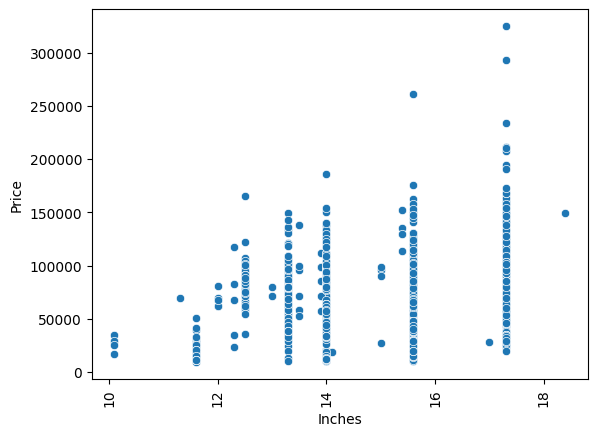

In [183]:
sns.scatterplot(x=df['Inches'],y=df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

In [184]:
def transform_size(x):
        if x < 12:
            return 'small'
        elif x > 17:
            return 'big'
        else:
             return 'medium'
        
df['size'] = df['Inches'].apply(transform_size)

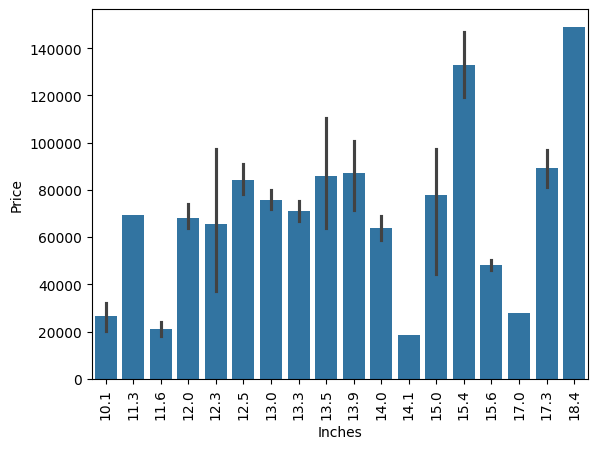

In [185]:
sns.barplot(x=df['Inches'],y=df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

In [186]:
df['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
IPS Panel 1366x768                                 7
Touchscreen 2560x1440                              7
4K Ultra HD 3840x2160                              7
IPS Panel Retina Display 2304x1440                 6
IPS Panel Retina Display 2560x1600                 6
Touchscreen 2256x1504                              6
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Touchscreen 2560x14

In [187]:
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x: 1 if 'Touchscreen'in x else 0 )
df['IPS Panel'] = df['ScreenResolution'].apply(lambda x: 1 if 'IPS Panel'in x else 0 )

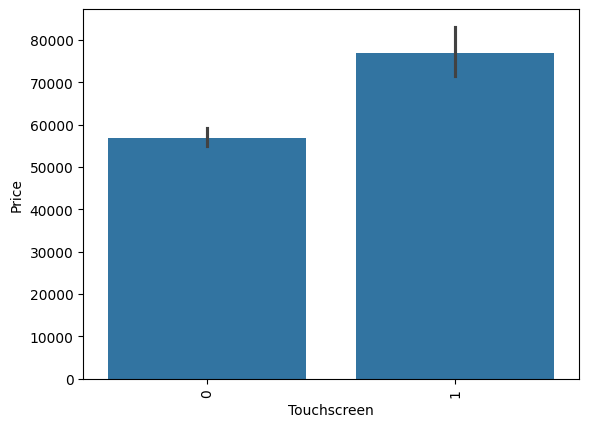

In [188]:
sns.barplot(x=df['Touchscreen'],y=df['Price'])

plt.xticks(rotation = 'vertical')
plt.show()

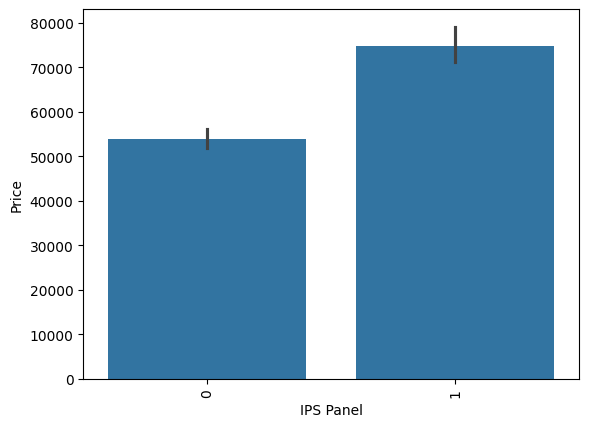

In [189]:
sns.barplot(x=df['IPS Panel'],y=df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

In [190]:
temp = df['ScreenResolution'].str.split(" ")
df['Screen-Resolution'] = temp.apply(lambda x : x[len(x)-1])


<Axes: xlabel='Screen-Resolution'>

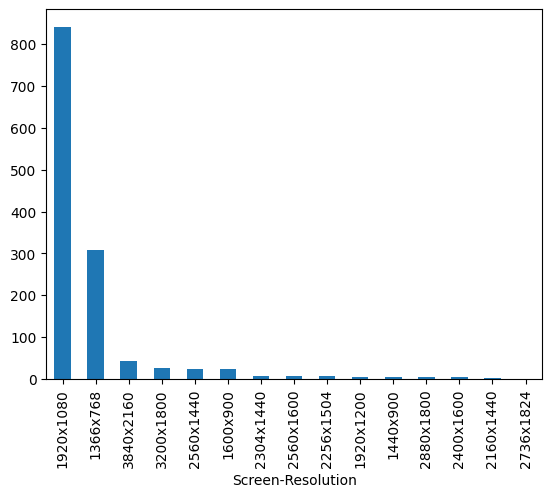

In [191]:
df['Screen-Resolution'].value_counts().plot(kind='bar')

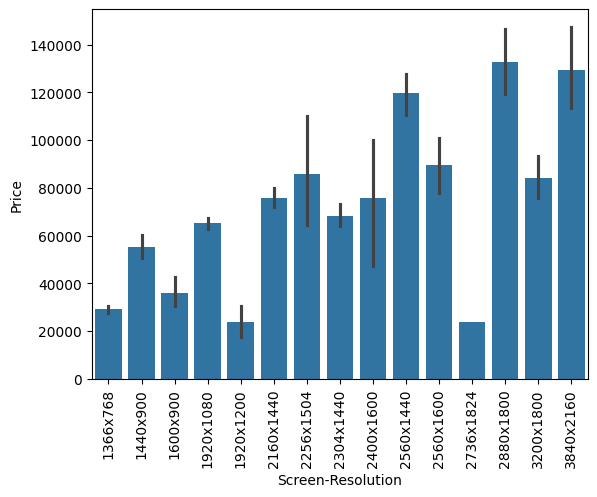

In [192]:
dummy_df = df.sort_values('Screen-Resolution')
sns.barplot(x=dummy_df['Screen-Resolution'],y=dummy_df['Price'],)

plt.xticks(rotation = 'vertical')

plt.show()

In [193]:

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company            1303 non-null   object 
 1   TypeName           1303 non-null   object 
 2   Inches             1303 non-null   float64
 3   ScreenResolution   1303 non-null   object 
 4   Cpu                1303 non-null   object 
 5   Ram                1303 non-null   int64  
 6   Memory             1303 non-null   object 
 7   Gpu                1303 non-null   object 
 8   OpSys              1303 non-null   object 
 9   Weight             1303 non-null   float64
 10  Price              1303 non-null   float64
 11  size               1303 non-null   object 
 12  Touchscreen        1303 non-null   int64  
 13  IPS Panel          1303 non-null   int64  
 14  Screen-Resolution  1303 non-null   object 
dtypes: float64(3), int64(3), object(9)
memory usage: 152.8+ KB


,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,size,Touchscreen,IPS Panel,Screen-Resolution
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,medium,0,1,2560x1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,medium,0,0,1440x900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,medium,0,0,1920x1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,medium,0,1,2880x1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,medium,0,1,2560x1600


In [194]:
df['Company'] = df['Company'].astype('category')
df['TypeName'] = df['TypeName'].astype('category')
df['Inches'] = df['Inches'].astype('category')
df['Screen-Resolution'] = df['Screen-Resolution'].astype('string')


In [195]:
resol = list(((df['Screen-Resolution'].apply(lambda x : x.split('x')))))
resol = pd.DataFrame(resol)
resol['Inches'] = df['Inches']
resol[0]= resol[0].astype('int')
resol[1] =resol[1].astype('int')
resol['Inches']=resol['Inches'].astype('float')

# ((resol[0]**2 + resol[1]**2)**0.5)/resol['Inches']

In [196]:
resol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1303 non-null   int64  
 1   1       1303 non-null   int64  
 2   Inches  1303 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 30.7 KB


In [197]:

df['PPI'] = (((resol[0]**2 + resol[1]**2)**0.5)/resol['Inches']).astype('float')

In [198]:
df.drop(columns='ScreenResolution',inplace=True)
df.drop(columns='Inches',inplace=True)
df.drop(columns=['Screen-Resolution'],inplace=True)

In [199]:
df

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,size,Touchscreen,IPS Panel,PPI
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,medium,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,medium,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,medium,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,medium,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,medium,0,1,226.983005
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,medium,1,1,157.350512
1299,Lenovo,2 in 1 Convertible,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,medium,1,1,276.053530
1300,Lenovo,Notebook,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,medium,0,0,111.935204
1301,HP,Notebook,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,medium,0,0,100.454670
